No missing values found.


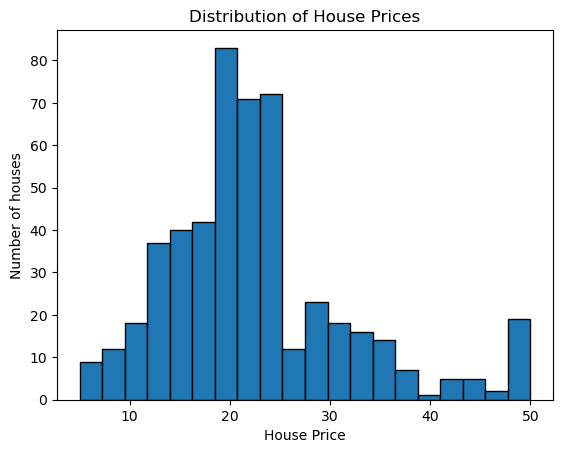

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Load the Boston housing dataset using make_regression
boston = pd.read_csv('boston.csv')
# Check for missing values in the entire DataFrame
if boston.isnull().values.any():
  print("There are missing values in the data!")
else:
  print("No missing values found.")

# Extract features and target variable
X = boston.copy().iloc[:, :-1]
y = boston['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Standardize the data using Standard Scaling.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Plot the distribution of the target variable (house prices)
plt.hist(y, bins=20, edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Number of houses')
plt.title('Distribution of House Prices')
plt.show()

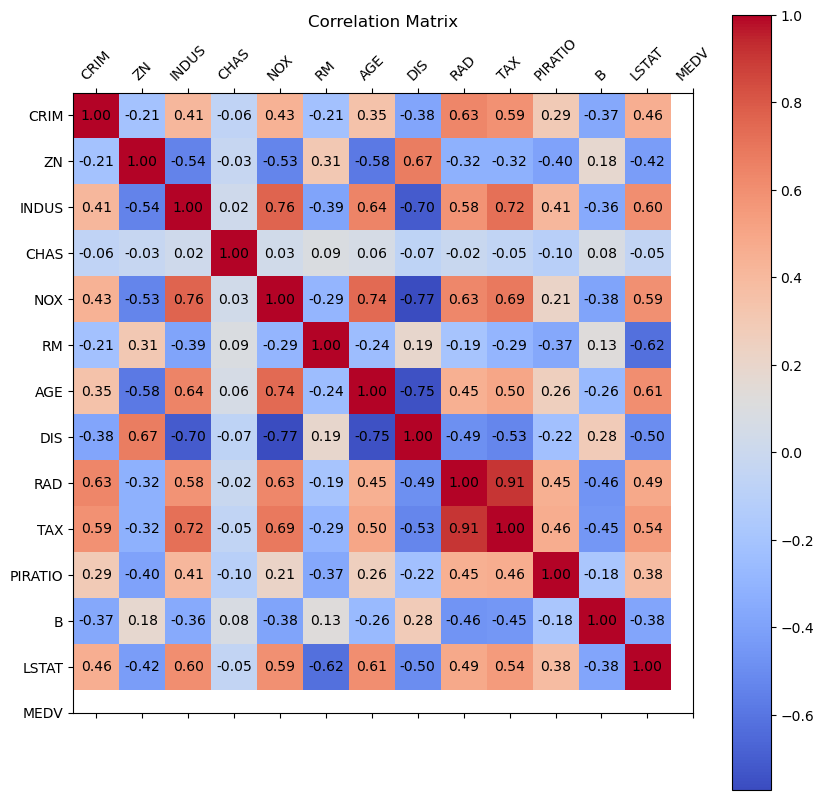

In [2]:
# 2. Create a correlation matrix
correlation_matrix = np.corrcoef(X_train.T)

# 3. Plot the correlation matrix as a heatmap
plt.matshow(correlation_matrix, cmap='coolwarm')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(i, j, f"{correlation_matrix[i, j]:.2f}", ha="center", va="center")
plt.xticks(range(len(boston.columns)), boston.columns, rotation=45)
plt.yticks(range(len(boston.columns)), boston.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.gcf().set_size_inches(10, 10)
plt.show()


Root mean squared error = 6.4595
R-squared = 0.5150


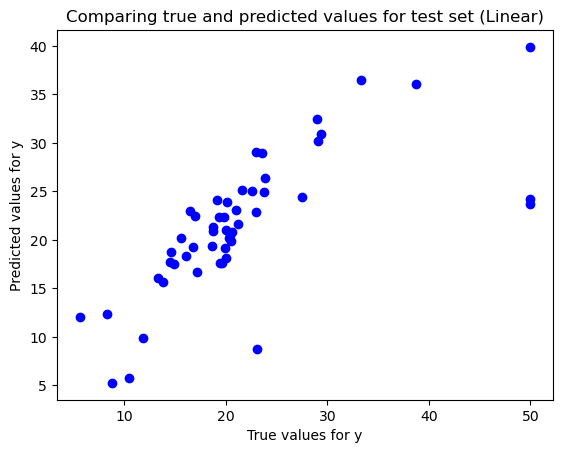

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()
# Fit regression model to the training set
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.title('Comparing true and predicted values for test set (Linear)')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Define the KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 4. Ridge regression model hyperparameter search
alphas = np.logspace(-5, 2, 100)
# Initialize variables to store MSEs and best hyperparameter
mse_scores = []
best_alpha = None
for alpha in alphas:
    mse_scores_fold = []
    for train_index, test_index in kf.split(X_train):
        # Split data for this fold
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_fold, y_train_fold)
        
        # Calculate MSE
        y_pred = ridge.predict(X_test_fold)
        mse = mean_squared_error(y_test_fold, y_pred)
        # Append MSE to the list
        mse_scores_fold.append(mse)
        
     # Calculate average MSE for this hyperparameter
    average_mse = np.mean(mse_scores_fold)
      # Append average MSE to the list of MSEs for all hyperparameters
    mse_scores.append(average_mse)
    
    # 5. Select best hyperparameter
best_alpha = alphas[np.argmin(mse_scores)]

# 6. Create and train ridge regression model
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Calculate MSE on the testing set
mse = mean_squared_error(y_test, y_pred)

print("Best alpha:", best_alpha)
print("Mean Squared Error (Test):", mse)

Best alpha: 0.14849682622544635
Mean Squared Error (Test): 41.744474356875656


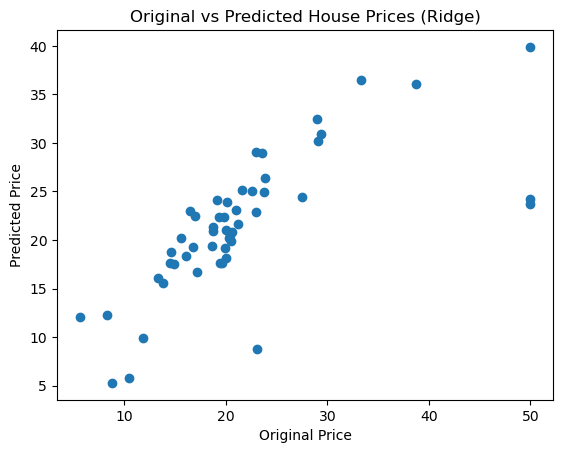

Training set MSE (from model training): 19.93658363808056
Testing set MSE: 41.744474356875656


In [19]:
from sklearn.metrics import mean_squared_error

coef = ridge.coef_
intercept = ridge.intercept_
predicted_prices = X_test.dot(coef) + intercept  # Matrix multiplication for multiple features

# 7. Evaluate model performance
mse_train = mean_squared_error(y_train, ridge.predict(X_train))
mse_test = mean_squared_error(y_test, ridge.predict(X_test))

# 8. Plot original house price vs predicted house price
plt.scatter(y_test, ridge.predict(X_test))
plt.xlabel("Original Price")
plt.ylabel("Predicted Price")
plt.title("Original vs Predicted House Prices (Ridge)")
plt.show()

# Print results (assuming mse_train is available from model training)
print("Training set MSE (from model training):", mse_train)
print("Testing set MSE:", mse_test)